In [107]:
# Display data types of each column
display(df.info())

# Display the number of missing values in each column
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

None

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [108]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory=False)

# Display the first few rows
display(df.head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [109]:
# Get the unique property types and their counts
property_types = df['room type'].value_counts()

# Display the property types and their counts
display(property_types)

,count
room type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


In [110]:
# Get the count of listings by neighborhood group
neighborhood_listings = df['neighbourhood group'].value_counts()

# Display the neighborhood group with the highest number of listings
display(neighborhood_listings)

# Display the neighborhood group with the highest number of listings
most_listings_neighborhood = neighborhood_listings.idxmax()
most_listings_count = neighborhood_listings.max()
print(f"\nNeighborhood group with the highest number of listings: {most_listings_neighborhood} ({most_listings_count} listings)")

,count
neighbourhood group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1



Neighborhood group with the highest number of listings: Manhattan (43792 listings)


In [111]:
# Calculate the average price by neighborhood group
average_price_by_neighborhood = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

# Display the average prices by neighborhood group
display(average_price_by_neighborhood)

,price
neighbourhood group,
Queens,630.207647
Bronx,627.766359
Brooklyn,626.562193
Staten Island,624.490546
Manhattan,622.440227
brookln,580.000000
manhatan,460.000000


,price
count,102352.000000
mean,625.293536
std,331.671614
min,50.000000
25%,340.000000
50%,624.000000
75%,913.000000
max,1200.000000


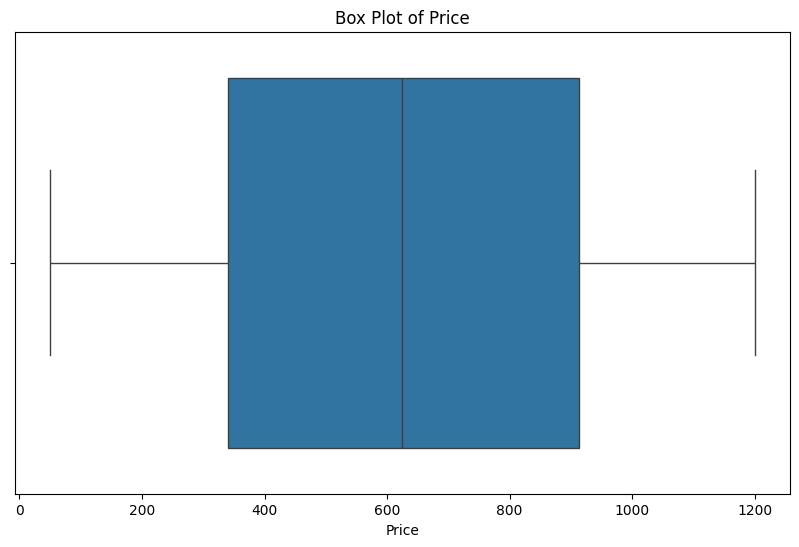

In [112]:
# Display descriptive statistics for the 'price' column
display(df['price'].describe())

# Create a box plot to visualize the distribution of the 'price' column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

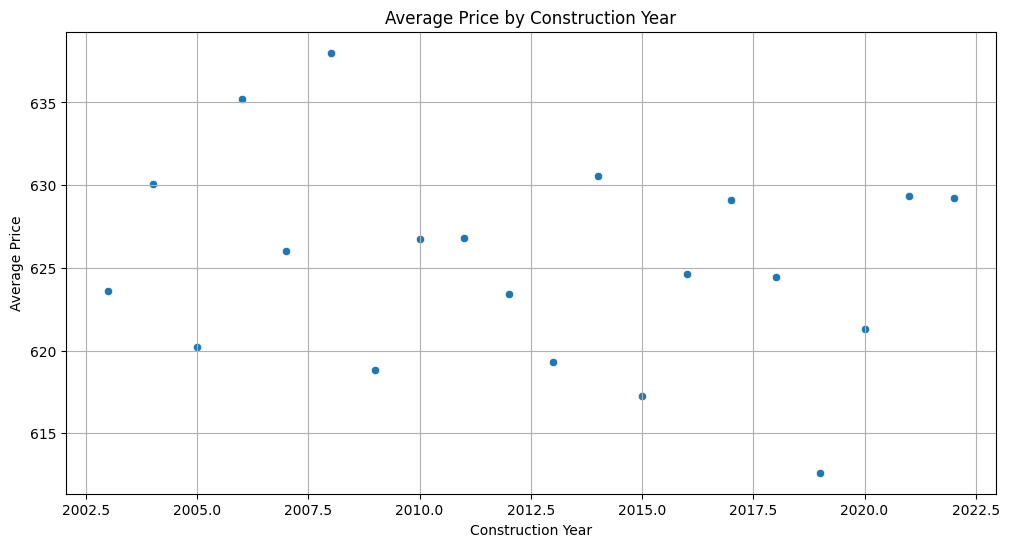

In [113]:
# Remove rows with missing 'Construction year'
df_cleaned = df.dropna(subset=['Construction year']).copy()

# Convert 'Construction year' to integer type
df_cleaned['Construction year'] = df_cleaned['Construction year'].astype(int)

# Calculate the average price by construction year
average_price_by_year = df_cleaned.groupby('Construction year')['price'].mean()

# Create a scatter plot or line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=average_price_by_year.index, y=average_price_by_year.values)
plt.title('Average Price by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [114]:
# Calculate the number of listings per host
host_listings_count = df.groupby(['host id', 'host name']).size().reset_index(name='listing_count')

# Sort by listing count in descending order and get the top 10
top_10_hosts = host_listings_count.sort_values(by='listing_count', ascending=False).head(10)

# Display the top 10 hosts
display(top_10_hosts)

,host id,host name,listing_count
15818,15293596806,Zak,2
28582,27692673803,Irisha,2
61707,59749079462,Alissa,2
95872,93151875101,Gabriel,2
95491,92780269224,Lindsay,2
30633,29626370251,Ben,2
453,538762830,Alessandra,2
33348,32202051101,Chun Kit,2
55076,53279156991,Chantal,2
20545,19867591692,Kathrine,2


In [115]:
# Compare review rates for verified and unverified hosts
average_review_rate_by_verification = df.groupby('host_identity_verified')['review rate number'].mean()

# Display the average review rates
display(average_review_rate_by_verification)

,review rate number
host_identity_verified,
unconfirmed,3.271767
verified,3.286684


In [116]:
# Calculate the correlation between 'price' and 'service fee'
price_service_fee_correlation = df['price'].corr(df['service fee'])

# Display the correlation coefficient
print(f"Correlation between Price and Service Fee: {price_service_fee_correlation}")

Correlation between Price and Service Fee: 0.9999908755543349


In [117]:
# Calculate the overall average review rate number
overall_average_review_rate = df['review rate number'].mean()
print(f"Overall Average Review Rate Number: {overall_average_review_rate:.2f}\n")

# Calculate the average review rate number by neighborhood group and room type
average_review_rate_by_location_and_type = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack()

# Display the average review rates by neighborhood group and room type
display(average_review_rate_by_location_and_type)

Overall Average Review Rate Number: 3.28



room type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood group,,,,
Bronx,3.346457,NaN,3.329706,3.264957
Brooklyn,3.250378,3.75,3.264465,3.336983
Manhattan,3.275807,3.50,3.277576,3.257459
Queens,3.349154,3.75,3.315585,3.377778
Staten Island,3.329087,NaN,3.479482,3.533333
brookln,NaN,NaN,4.000000,NaN
manhatan,NaN,NaN,3.000000,NaN


Correlation between Calculated Host Listings Count and Availability 365: 0.1591942422813064


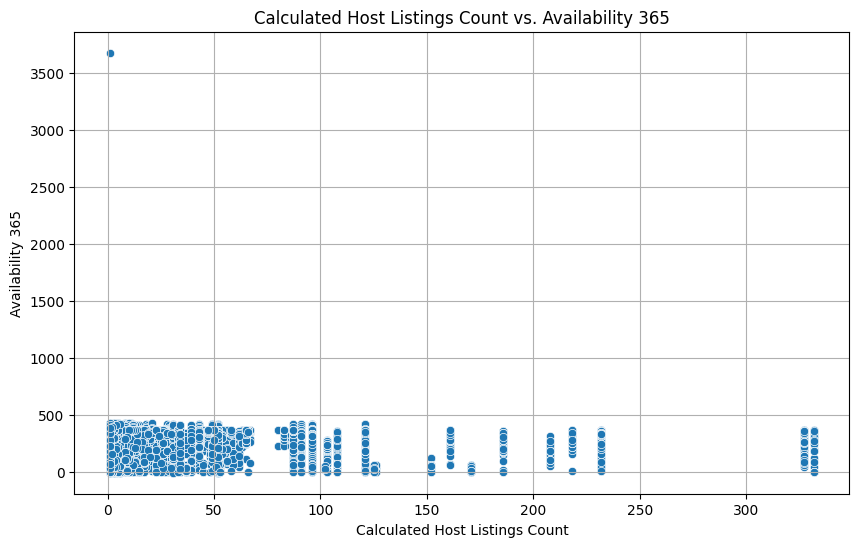

In [118]:
# Calculate the correlation between 'calculated host listings count' and 'availability 365'
availability_listing_correlation = df['calculated host listings count'].corr(df['availability 365'])

print(f"Correlation between Calculated Host Listings Count and Availability 365: {availability_listing_correlation}")

# Create a scatter plot to visualize the relationship (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['calculated host listings count'], y=df['availability 365'])
plt.title('Calculated Host Listings Count vs. Availability 365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.grid(True)
plt.show()

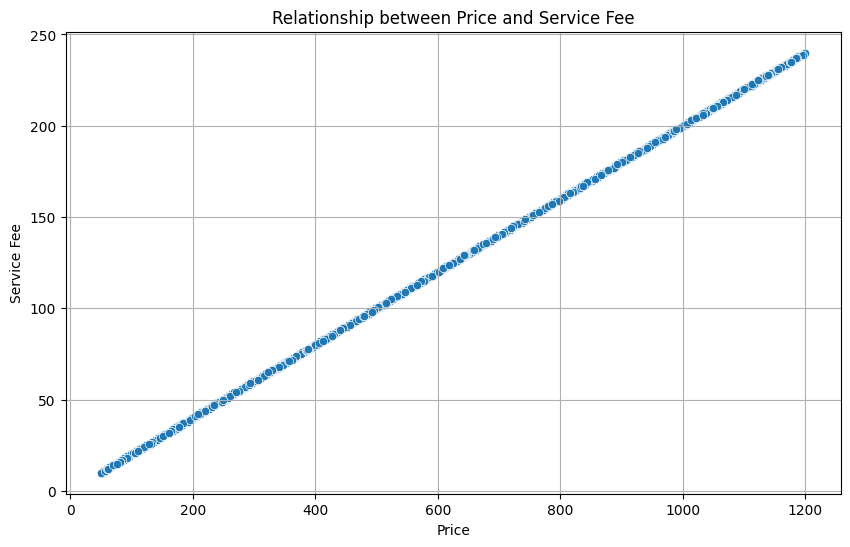

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price'], y=df['service fee'])
plt.title('Relationship between Price and Service Fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.grid(True)
plt.show()

In [120]:
# Filter the DataFrame for 'Entire home/apt' room type
entire_home_listings = df[df['room type'] == 'Entire home/apt']

# Display the first few rows of the filtered DataFrame
display(entire_home_listings.head())

# Display the number of rows in the filtered DataFrame
print(f"\nNumber of listings with 'Entire home/apt': {len(entire_home_listings)}")

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,115.0,3.0,74.0,06/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
10,1006859,Cute & Cozy Lower East Side 1 bdrm,1280143094,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,United States,...,64.0,1.0,160.0,06/09/2019,1.33,3.0,4.0,1.0,NaN,NaN



Number of listings with 'Entire home/apt': 53701


Correlation between Review Rate Number and Price for 'Entire home/apt': -0.006447570191548764


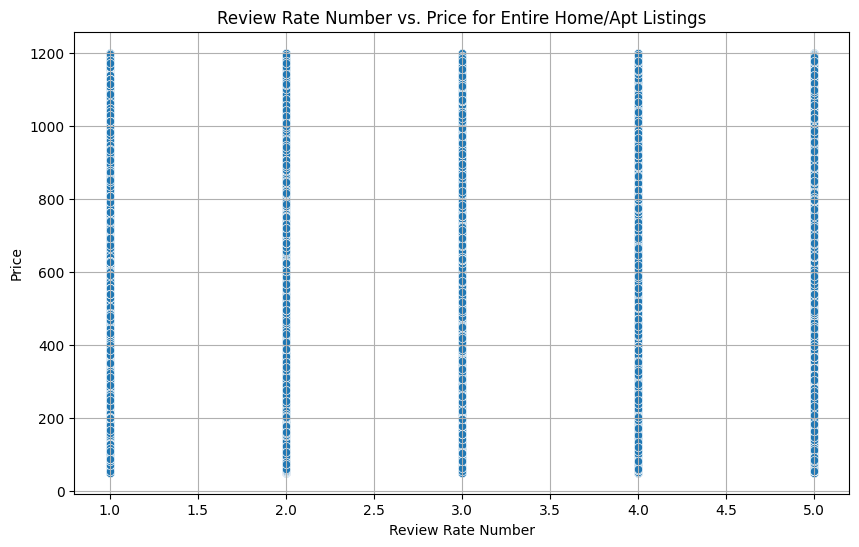

In [121]:
# Calculate the correlation between 'review rate number' and 'price' for 'Entire home/apt' listings
review_rate_price_correlation_entire_home = entire_home_listings['review rate number'].corr(entire_home_listings['price'])

print(f"Correlation between Review Rate Number and Price for 'Entire home/apt': {review_rate_price_correlation_entire_home}")

# Create a scatter plot to visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=entire_home_listings['review rate number'], y=entire_home_listings['price'])
plt.title('Review Rate Number vs. Price for Entire Home/Apt Listings')
plt.xlabel('Review Rate Number')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [122]:
# Display summary statistics for the entire_home_listings DataFrame
display(entire_home_listings.describe())

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,5.370100e+04,5.370100e+04,53699.000000,53699.000000,53579.000000,53568.000000,53574.000000,53476.000000,53626.000000,45865.000000,53542.000000,53527.000000,53488.000000
mean,2.869598e+07,4.935702e+10,40.726973,-73.957415,2012.463446,625.082232,124.968753,9.807671,27.375881,1.318349,3.274906,10.636688,142.760376
std,1.617399e+07,2.854512e+10,0.052689,0.047171,5.784541,331.713213,66.333165,29.377296,47.353702,1.569608,1.288414,41.257235,133.701718
min,1.002102e+06,1.236005e+08,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.462823e+07,2.464937e+10,40.688500,-73.986955,2007.000000,339.000000,68.000000,2.000000,2.000000,0.220000,2.000000,1.000000,6.000000
50%,2.922442e+07,4.923273e+10,40.725090,-73.962500,2012.000000,624.000000,125.000000,3.000000,8.000000,0.700000,3.000000,1.000000,110.000000
75%,4.207423e+07,7.414162e+10,40.761435,-73.942340,2017.000000,914.000000,183.000000,7.000000,31.000000,2.000000,4.000000,2.000000,265.000000
max,5.736742e+07,9.876313e+10,40.911600,-73.705220,2022.000000,1200.000000,240.000000,3455.000000,1024.000000,57.310000,5.000000,332.000000,3677.000000


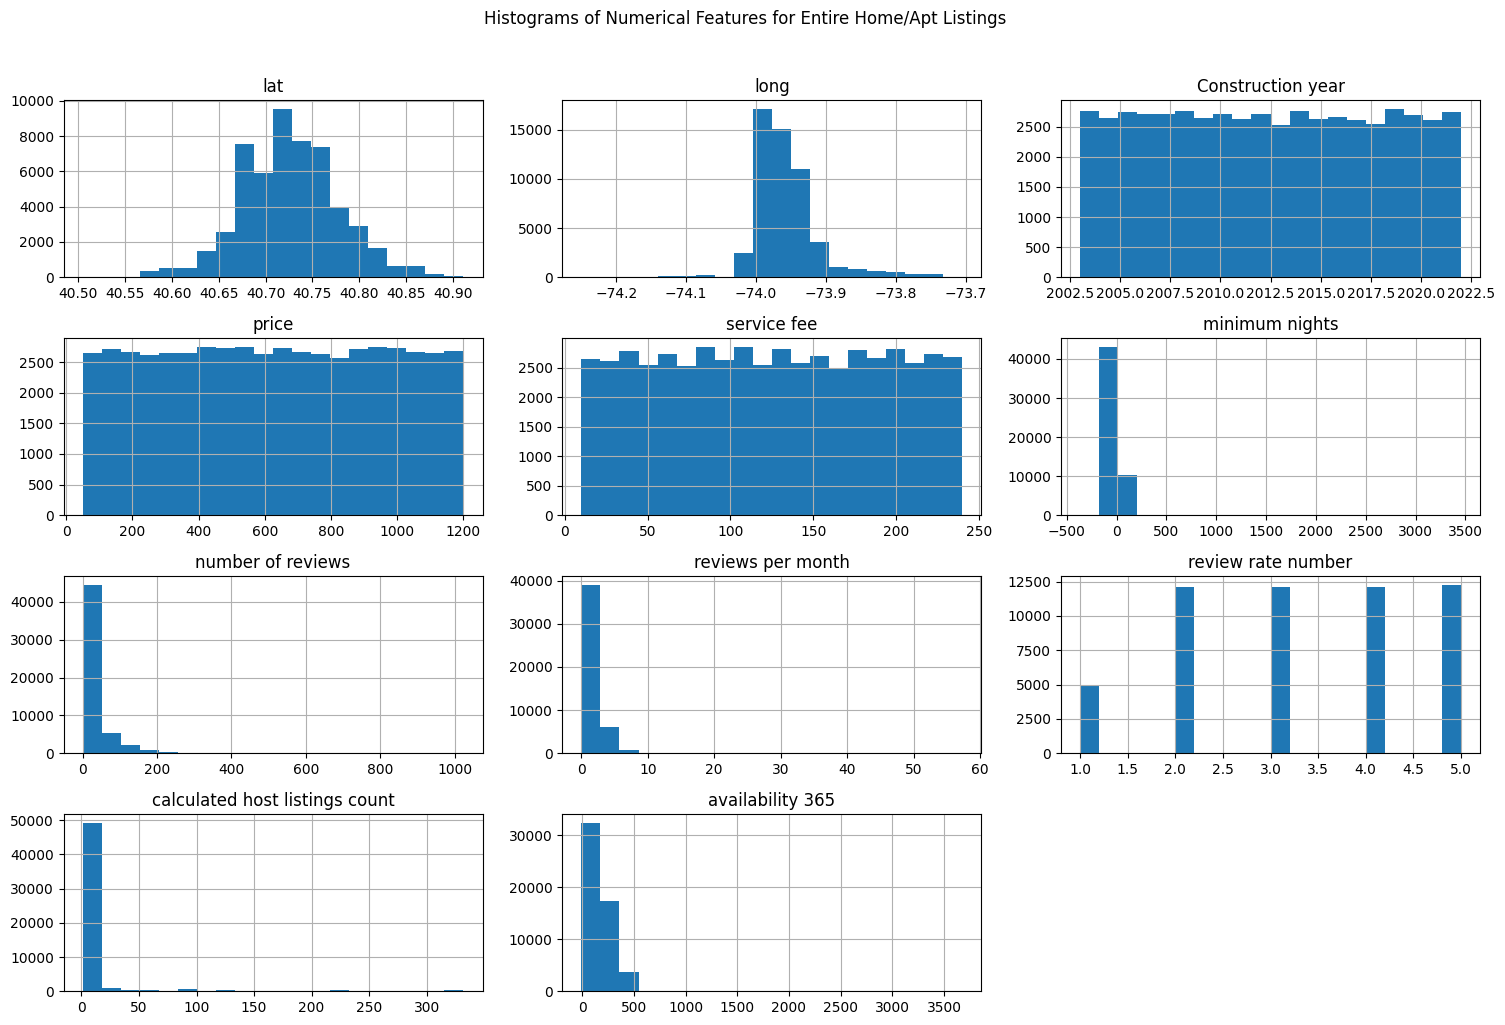

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for visualization (excluding 'id' and 'host id')
numerical_cols = entire_home_listings.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols_to_plot = [col for col in numerical_cols if col not in ['id', 'host id']]

# Create histograms for the selected numerical columns
entire_home_listings[cols_to_plot].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features for Entire Home/Apt Listings', y=1.02)
plt.tight_layout()
plt.show()